In [1]:
import random
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from datasets import Dataset
from PIL import Image
from IPython.display import display

d:\GIT-CS370-IntroductionToAI\cs370-tn268-introduction-to-ai-assignments\finalproj-segment-anything-model\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Checkpoint

In [10]:
from datasets import load_dataset
train = load_dataset("back2classroom/sidewalks", split='train', streaming=True)
print(next(iter(train)))

{'filename': '1001_10_1', 'tfw': b'1.0000000000\r\n0.0000000000\r\n0.0000000000\r\n1.0000000000\r\n0.0000000000\r\n2304.0000000000\r\n', 'tif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\

In [11]:
print(train)

IterableDataset({
    features: ['filename', 'tfw', 'tif', 'label_tif', 'label_tfw'],
    n_shards: 6
})


In [130]:
image_arr = []
label_arr = []
tif_bytes = []
lbl_bytes = []
fname = []

def byte_string_to_binary(label):
    """
    Convert a byte string to a binary black and white numpy array.

    Args:
    - label: A byte string representing an image.
    - threshold: Threshold value for binarization (default is 128).

    Returns:
    - binary_img_arr: A binary black and white numpy array.
    """
    # Convert byte string to PIL Image object
    image_object = io.BytesIO(label)
    image_array = np.array(Image.open(image_object))

    # Thresholding to convert to binary black and white
    binary_img_arr = (image_array).astype(np.uint8) * 255

    return image_object, binary_img_arr

# Iterate over the lists and combine them into dictionaries
dataframe = pd.DataFrame()

for idx, item in enumerate(train):
    image_object, image_array = byte_string_to_binary(item['tif'])
    label_object, label_array = byte_string_to_binary(item['label_tif'])
    # Check if the image is not full black
    if not np.all(label_array[0] == 0):
        print(idx)
        fname.append(item['filename'])
        tif_bytes.append(image_object)
        lbl_bytes.append(label_object)
        image_arr.append(image_array)
        label_arr.append(label_array)
    if idx == 10000:
        break

5
6
8
10
12
29
32
48
89
110
128
148
197
209
210
212
237
244
248
249
250
264
268
269
272
281
283
285
287
290
292
306
310
322
327
330
332
337
341
346
348
349
350
352
359
364
365
366
370
372
384
385
389
390
392
400
431
433
434
435
440
442
443
444
445
451
453
454
460
461
462
463
464
473
479
481
482
483
484
486
491
499
506
511
513
521
522
526
527
533
534
537
539
541
542
543
544
545
546
557
558
559
561
564
565
576
579
581
582
584
585
596
600
611
613
616
624
625
635
636
640
641
643
644
654
655
656
657
661
662
671
674
675
677
680
687
691
693
696
697
698
700
701
708
709
711
712
718
719
720
721
723
728
731
740
741
742
747
751
760
761
766
780
807
809
810
812
828
849
870
872
877
881
882
885
886
895
897
899
902
903
904
905
906
907
918
921
924
927
937
945
947
959
966
978
979
990
1003
1006
1009
1010
1012
1029
1044
1045
1050
1052
1070
1072
1089
1092
1108
1110
1126
1127
1128
1129
1145
1148
1149
1166
1168
1170
1172
1186
1187
1189
1204
1211
1223
1236
1237
1238
1243
1244
1245
1256
1258
1263
1264
1265
1276

In [236]:
# Create a DataFrame
df = pd.DataFrame({
    'image': tif_bytes,
    'label': lbl_bytes,
    'imgarr': image_arr,
    'lblarr': label_arr
})

# Export the DataFrame to a CSV file
df.to_pickle('dataset.pkl')

# Print the dimensions of the DataFrame
print("DataFrame Dimensions:", df.shape)

DataFrame Dimensions: (2820, 4)


## Checkpoint

In [2]:
data = pd.read_pickle('dataset.pkl')
print(data.head())

                                        image  \
0  <_io.BytesIO object at 0x000002C29A0CB2E0>   
1  <_io.BytesIO object at 0x000002C29A0CB330>   
2  <_io.BytesIO object at 0x000002C29A0CB380>   
3  <_io.BytesIO object at 0x000002C29A0CB3D0>   
4  <_io.BytesIO object at 0x000002C29A0CB420>   

                                        label  \
0  <_io.BytesIO object at 0x000002C29A15E7A0>   
1  <_io.BytesIO object at 0x000002C29A15E7F0>   
2  <_io.BytesIO object at 0x000002C29A15E840>   
3  <_io.BytesIO object at 0x000002C29A15E890>   
4  <_io.BytesIO object at 0x000002C29A15E8E0>   

                                              imgarr  \
0  [[[134, 124, 122], [63, 37, 38], [75, 13, 24],...   
1  [[[130, 192, 179], [132, 192, 184], [132, 188,...   
2  [[[204, 220, 217], [197, 206, 205], [194, 188,...   
3  [[[206, 154, 176], [152, 105, 125], [159, 125,...   
4  [[[148, 180, 167], [146, 178, 165], [144, 176,...   

                                              lblarr  
0  [[255, 255, 255

In [3]:
# Convert the NumPy arrays to Pillow images and store them in a dictionary
dataset_dict = {
    "image": [Image.fromarray(img) for img in data['imgarr']],
    "label": [Image.fromarray(mask) for mask in data['lblarr']],
}

# Create the dataset using the datasets.Dataset class
dataset = Dataset.from_dict(dataset_dict)

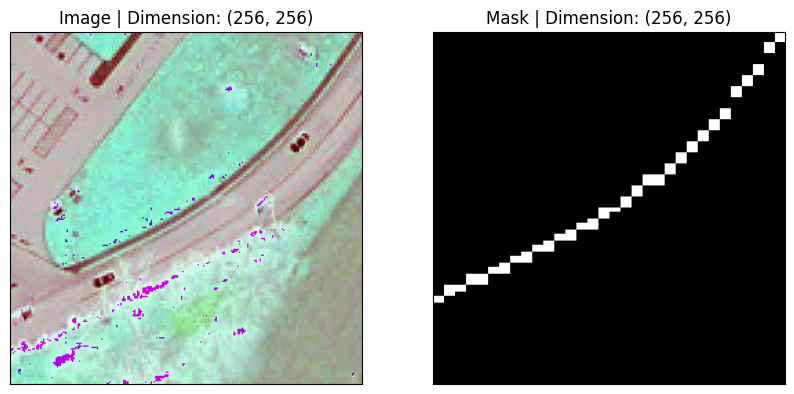

In [6]:
img_num = random.randint(0, dataset.shape[0])
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  
axes[0].set_title(f'Image | Dimension: {example_image.size}')

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')
axes[1].set_title(f'Mask | Dimension: {example_image.size}')

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

In [8]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [10]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [11]:
# Create an instance of the SAMDataset
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [12]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [13]:
# Create a DataLoader instance for the training dataset
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)

In [14]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
input_boxes torch.Size([2, 1, 4])
ground_truth_mask torch.Size([2, 256, 256])


In [15]:
batch["ground_truth_mask"].shape

torch.Size([2, 256, 256])

In [16]:
# Load the model
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

from torch.optim import Adam
import monai
from monai.metrics import DiceMetric

# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True)

In [17]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Training loop
num_epochs = 1

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

 30%|██▉       | 422/1410 [17:27<37:11,  2.26s/it]  